# Abalone Dataset

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)

The dataset used was from: https://archive.ics.uci.edu/ml/datasets/Abalone

The value to predict is the number of rings to stablish the age of the Abalone, more information on the abalone.names file.

### 1. Gathering Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import urllib

In [2]:
# download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/'
data = url + 'abalone.data'

with urllib.request.urlopen(data) as f:
    d = f.read().decode().split('\n')

In [3]:
# transform to a list
nlen = len(d)
abalone_data = []
for i in range(nlen):
    if d[i].split(',') == ['']:
        continue
    row_data = d[i].split(',')
    abalone_data.append(row_data)

In [4]:
# transform to a dataframe
names = ['sex', 'lenght', 'diameter', 
         'height', 'whole_weight', 'shucked_weight', 
         'viscera_weight', 'shell', 'rings']
abalone_df = pd.DataFrame(data=abalone_data, columns=names)

In [5]:
# convert columns to numeric
for i in range(1, len(names)):
    abalone_df[names[i]] = pd.to_numeric(abalone_df[names[i]])

In [6]:
abalone_df.head()

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
abalone_df.to_csv('abalone.csv', index=False)
pd.DataFrame(data=[abalone_df.min(), abalone_df.max()], index=['min', 'max'])

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell,rings
min,F,0.075,0.055,0.00,0.0020,0.001,0.0005,0.0015,1
max,M,0.815,0.650,1.13,2.8255,1.488,0.7600,1.0050,29


In [8]:
abalone_df.dtypes

sex                object
lenght            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell             float64
rings               int64
dtype: object

### 2.  Some Visual Insights

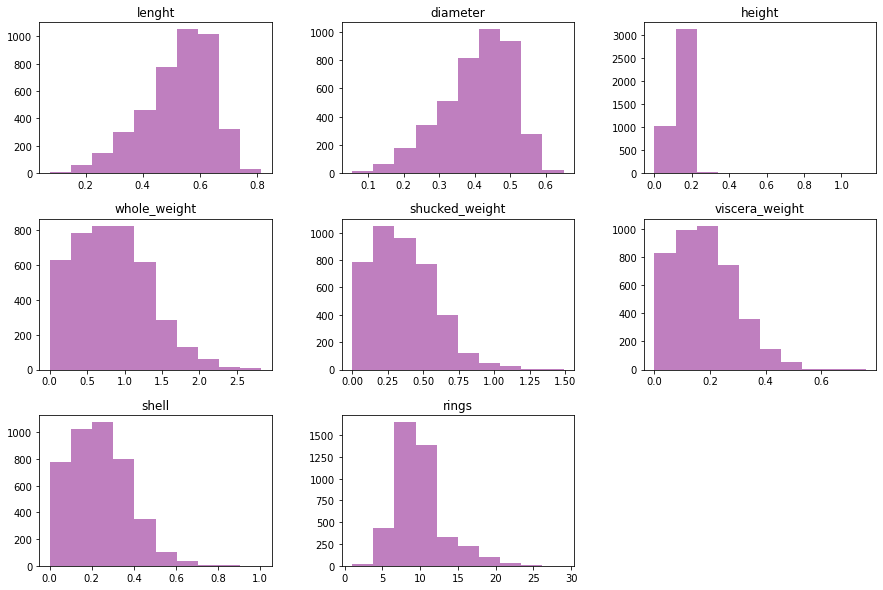

In [9]:
abalone_df.hist(figsize=(15,10), grid=False, alpha=0.5, color='purple');

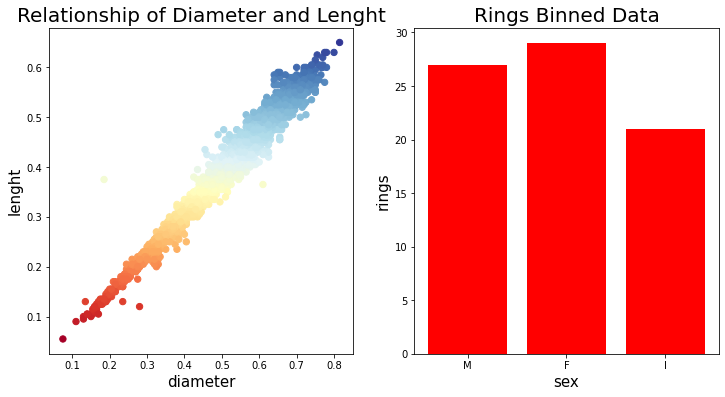

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Relationship of Diameter and Lenght", size=20)
plt.xlabel('diameter', size=15)
plt.ylabel('lenght', size=15)
plt.scatter(abalone_df['lenght'], abalone_df['diameter'], c=abalone_df['diameter'], s=40, cmap=plt.cm.RdYlBu)
plt.subplot(1, 2, 2)
plt.title("Rings Binned Data", size=20)
plt.bar(abalone_df['sex'], abalone_df['rings'], color='red')
plt.xlabel('sex', size=15)
plt.ylabel('rings', size=15)
plt.show()

### 3. Handling Missing Data

In [11]:
# No missing data, nothing to handle

abalone_df.isnull().sum()

sex               0
lenght            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell             0
rings             0
dtype: int64

### 4. Feature Extraction

We will explore at first the dataset and some correlations for finally using PCA to redice dimensionality

In [12]:
abalone_df.describe()

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
abalone_df.corr()

,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight,shell,rings
lenght,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [14]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(abalone_df['sex'])

LabelEncoder()

In [15]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [16]:
abalone_df['sex'] = le.transform(abalone_df['sex'])

In [17]:
le.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [18]:
targets = abalone_df.pop('rings')
targets

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings, Length: 4177, dtype: int64

In [19]:
features = abalone_df.iloc[:, :-1]
features

,sex,lenght,diameter,height,whole_weight,shucked_weight,viscera_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [20]:
targets = np.array(targets)
features = np.array(features)

### 5) Model Training and Evaluations

In [21]:
# split between the datasets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, targets, test_size=0.2, random_state=42)

In [22]:
# fit only training data
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain)

# Appluy transforms to both training and test set
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [23]:
from sklearn.svm import SVR

svm = SVR(kernel="poly", C=2, gamma="auto", degree=3, epsilon=0.6, coef0=1)
#svm = SVR(kernel="rbf", C=2, gamma="auto", degree=3, epsilon=0.6, coef0=1)
#svm = SVR(kernel="linear", C=10, gamma="auto")
svm.fit(Xtrain, Ytrain)

SVR(C=2, coef0=1, epsilon=0.6, gamma='auto', kernel='poly')

In [24]:
svm_preds = np.floor(svm.predict(Xtest))

In [25]:
from sklearn.model_selection import cross_validate

cross_validate(svm, Xtest, Ytest, cv=5)

{'fit_time': array([0.05271626, 0.02692914, 0.03191447, 0.02493882, 0.02593136]),
 'score_time': array([0.00199461, 0.0020256 , 0.00099826, 0.00199485, 0.00099659]),
 'test_score': array([0.511691  , 0.56274293, 0.44850276, 0.58046963, 0.44075629])}

In [26]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Ytest, svm_preds)
mae

1.5095693779904307

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(Xtest, Ytest)
preds = np.floor(rf.predict(Xtest))

In [28]:
cross_validate(rf, Xtest, Ytest, cv=5)

{'fit_time': array([0.11469197, 0.13564658, 0.12935972, 0.12862825, 0.13962579]),
 'score_time': array([0.        , 0.00797939, 0.00797868, 0.00897598, 0.009974  ]),
 'test_score': array([0.33339628, 0.44458489, 0.23611056, 0.40454886, 0.31366892])}

In [29]:
mae = mean_absolute_error(Ytest, preds)
mae

1.6913875598086126

In [30]:
from sklearn.linear_model import SGDRegressor

sgd = RandomForestRegressor(max_depth=2, random_state=0)
sgd.fit(Xtest, Ytest)
preds = np.floor(sgd.predict(Xtest))

In [31]:
cross_validate(sgd, Xtest, Ytest, cv=5)

{'fit_time': array([0.13460588, 0.1296792 , 0.12965441, 0.13660908, 0.14162278]),
 'score_time': array([0.0089767 , 0.00797844, 0.00698018, 0.00997305, 0.00701451]),
 'test_score': array([0.33339628, 0.44458489, 0.23611056, 0.40454886, 0.31366892])}

In [32]:
mae = mean_absolute_error(Ytest, preds)
mae

1.6913875598086126

In [33]:
from sklearn.neighbors import KNeighborsRegressor as nn

knn = nn(8, weights='uniform')
knn.fit(Xtrain, Ytrain)

KNeighborsRegressor(n_neighbors=8)

In [34]:
preds = np.floor(knn.predict(Xtest))

In [35]:
cross_validate(knn, Xtest, Ytest, cv=5)

{'fit_time': array([0.00300121, 0.00299287, 0.00196791, 0.00099611, 0.00099897]),
 'score_time': array([0.00493956, 0.0030179 , 0.00202203, 0.00196457, 0.00302386]),
 'test_score': array([0.37770523, 0.48820826, 0.42153152, 0.45839804, 0.39094694])}

In [36]:
mae = mean_absolute_error(Ytest, preds)
mae

1.6172248803827751

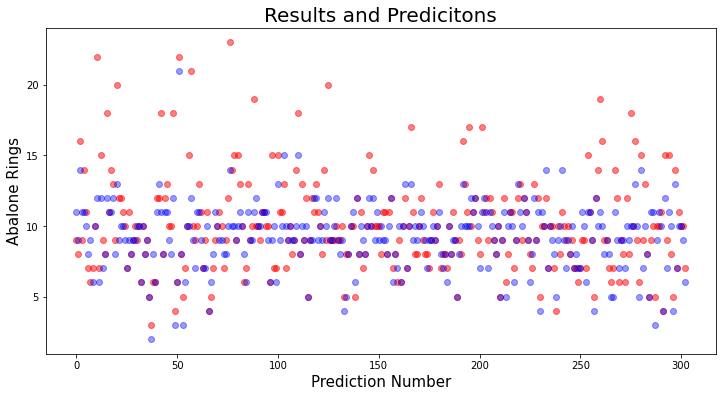

In [37]:
npoints = len(Xtest)
graph_points = np.random.randint(npoints)
xdata = range(len(Xtest[:graph_points]))
ydata = Ytest[:graph_points]
ypreds = svm_preds[:graph_points]
plt.figure(figsize=(12, 6))
plt.title("Results and Predicitons", size=20)
plt.xlabel('Prediction Number', size=15)
plt.ylabel('Abalone Rings', size=15)
plt.scatter(xdata, ydata, color='red', alpha=0.5)
plt.scatter(xdata, ypreds, color='blue', alpha=0.4)
plt.show()

### 6) Model Saving and Loading

In [38]:
import pickle


filename = 'model.pkl'
pickle.dump(svm, open(filename, 'wb'))

In [39]:
# load the model from disk
model = pickle.load(open('model.pkl', 'rb'))
preds = np.floor(model.predict(Xtest))

In [40]:
assert(len(preds) == ((preds == svm_preds) == True).sum())

In [41]:
Xtest[0]

array([1.15264565, 0.67189513, 0.47107108, 0.47543449, 0.55474298,
       0.27104784, 1.10272193])